# Year 2023 Day 22


In [1]:
from advent_of_code.common.common import get_puzzle_input_file_path
from advent_of_code.y_2023.problem_202322 import (
    compute_supported_bricks_from_initial_bricks,
    parse_text_input,
)

from advent_of_code.common.store import ExampleInputsStore
from advent_of_code.common.graph_visualization import construct_dot_graph_from_dict

## Test Input


In [2]:
EXAMPLE_INPUT = ExampleInputsStore.from_private_resources_repository(2023).retrieve(
    "test_problem_202322"
)

In [3]:
text = EXAMPLE_INPUT
unsorted_bricks = parse_text_input(text)
supported_bricks = compute_supported_bricks_from_initial_bricks(unsorted_bricks)
supported_bricks

{1: (2, 3), 2: (4, 5), 3: (4, 5), 4: (6,), 5: (6,), 6: (7,), 7: ()}

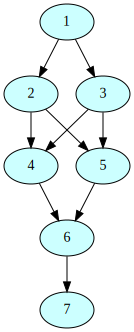

In [4]:
dot = construct_dot_graph_from_dict(supported_bricks)
dot

In [5]:
from advent_of_code.y_2023.problem_202322 import compute_support_counts


support_counts = compute_support_counts(supported_bricks)
a = dict(support_counts)
b = dict(support_counts)
a.clear()
b.clear()
a, b, support_counts

({}, {}, defaultdict(int, {2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 1}))

In [6]:
updated_support_counts_when_node_removed = {}
for b_id, children in supported_bricks.items():
    sc = dict(support_counts)  # copy support counts, it will be mutated

    q = []
    # q.extend([b_id])
    q.extend(list(children))

    max_iter_security = 1000
    iter_count = 0
    while q and iter_count < max_iter_security:
        node = q.pop(0)
        sc[node] = max(0, sc[node] - 1)
        q.extend(list(supported_bricks[node]))

    updated_support_counts_when_node_removed[b_id] = sc
updated_support_counts_when_node_removed

{1: {2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0},
 2: {2: 1, 3: 1, 4: 1, 5: 1, 6: 0, 7: 0},
 3: {2: 1, 3: 1, 4: 1, 5: 1, 6: 0, 7: 0},
 4: {2: 1, 3: 1, 4: 2, 5: 2, 6: 1, 7: 0},
 5: {2: 1, 3: 1, 4: 2, 5: 2, 6: 1, 7: 0},
 6: {2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 0},
 7: {2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 1}}

In [7]:
chain_reaction_other_fallen_bricks_count = {
    node: sum(v == 0 for v in value.values())
    for node, value in updated_support_counts_when_node_removed.items()
}
chain_reaction_other_fallen_bricks_count

{1: 6, 2: 2, 3: 2, 4: 1, 5: 1, 6: 1, 7: 0}

In [8]:
sum(support_counts.values())

9

In [9]:
from advent_of_code.y_2023.problem_202322 import (
    compute_chain_reaction_other_fallen_bricks_count,
    compute_disintegrable_bricks,
    compute_updated_support_counts_when_node_removed,
    solve_part_2,
)

can_be_disintegrated = compute_disintegrable_bricks(supported_bricks, support_counts)

updated_support_counts_when_node_removed = (
    compute_updated_support_counts_when_node_removed(supported_bricks, support_counts)
)

chain_reaction_other_fallen_bricks_count = (
    compute_chain_reaction_other_fallen_bricks_count(
        updated_support_counts_when_node_removed
    )
)

In [10]:
can_be_disintegrated

{1: False, 2: True, 3: True, 4: True, 5: True, 6: False, 7: True}

In [11]:
updated_support_counts_when_node_removed

{1: {2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0},
 2: {2: 1, 3: 1, 4: 1, 5: 1, 6: 2, 7: 1},
 3: {2: 1, 3: 1, 4: 1, 5: 1, 6: 2, 7: 1},
 4: {2: 1, 3: 1, 4: 2, 5: 2, 6: 1, 7: 1},
 5: {2: 1, 3: 1, 4: 2, 5: 2, 6: 1, 7: 1},
 6: {2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 0},
 7: {2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 1}}

In [12]:
dangerous_bricks = {
    k: v
    for k, v in updated_support_counts_when_node_removed.items()
    if not can_be_disintegrated[k]
}
dangerous_consequences = compute_chain_reaction_other_fallen_bricks_count(
    dangerous_bricks
)
assert sum(dangerous_consequences.values()) == 7

In [13]:
solve_part_2(supported_bricks, support_counts, False)

7

In [14]:
solve_part_2(supported_bricks, support_counts, True)

7

## Validation Input


In [15]:
text = (get_puzzle_input_file_path(2023, 22)).read_text()
unsorted_bricks = parse_text_input(text)

In [16]:
supported_bricks = compute_supported_bricks_from_initial_bricks(unsorted_bricks)
sample = dict(list(supported_bricks.items())[:5])
sample

{1: (20, 35), 2: (25, 28), 3: (23,), 4: (10,), 5: (21, 26)}

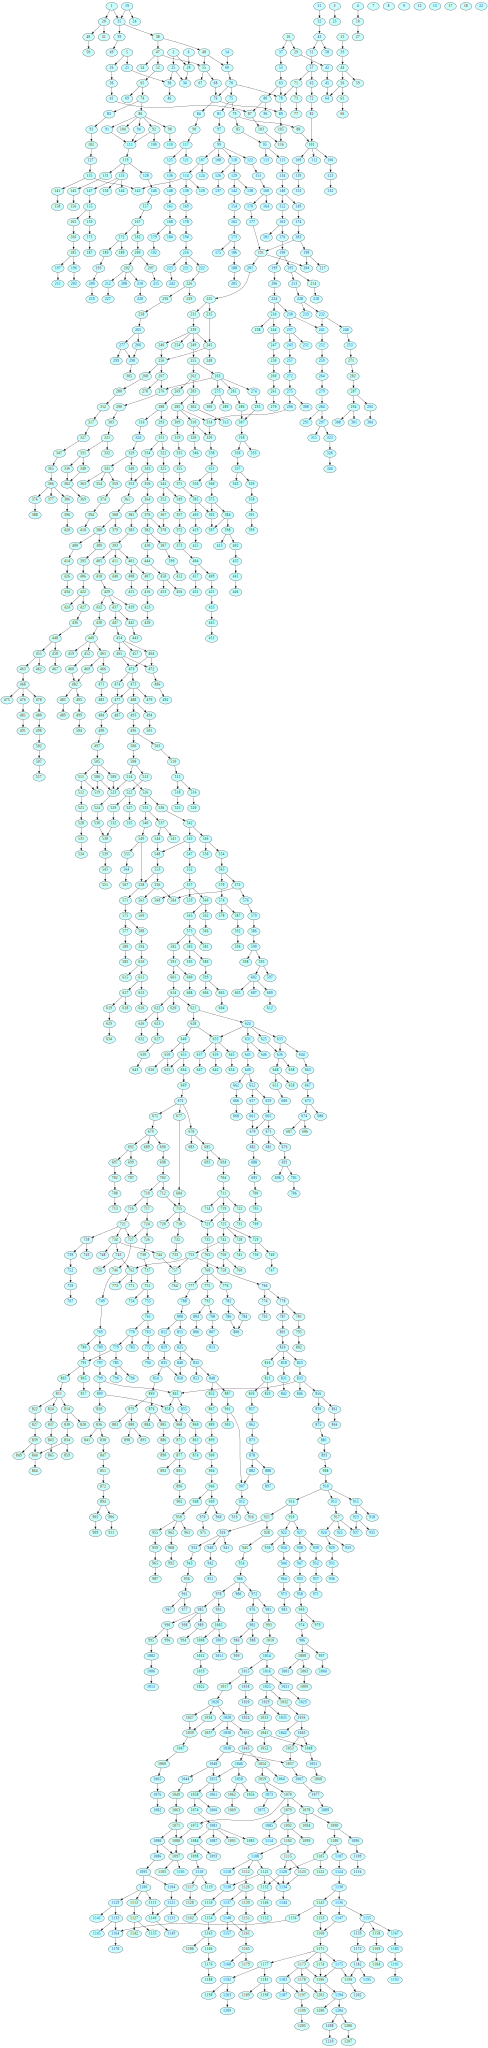

In [17]:
dot = construct_dot_graph_from_dict(supported_bricks)
dot